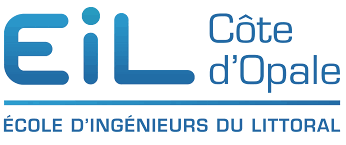

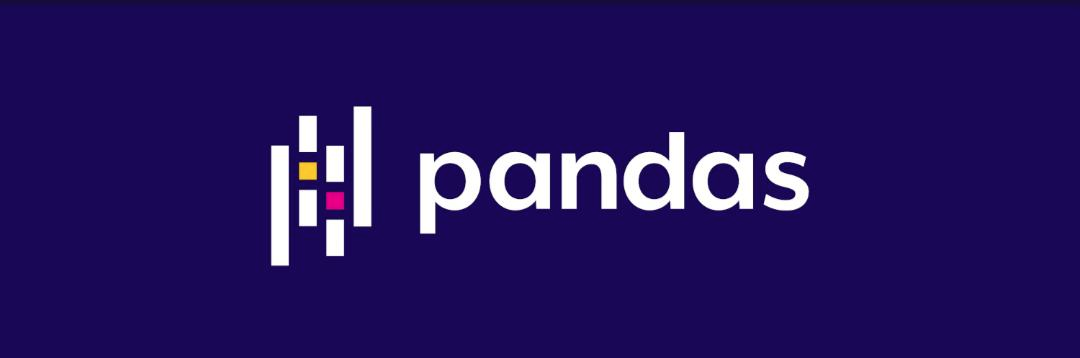

# Connaissance de pandas

## Les Series

pandas est également un module fondamental pour l'analyse de données
(<https://pandas.pydata.org/>) .

Pandas est une librairie python qui permet de manipuler facilement des
données à analyser :

-   manipuler des tableaux de données avec des étiquettes de variables
    (colonnes) et d'individus (lignes). ;
-   ces tableaux sont appelés DataFrames, similaires aux dataframes sous
    R ;
-   on peut facilement lire et écrire ces dataframes à partir ou vers un
    fichier tabulé. ;
-   on peut facilement tracer des graphes à partir de ces DataFrames
    grâce à matplotlib.

##  Installation :

avec **python**

pip3 install pandas

avec **anaconda**

conda install pandas

pour un IDE comme PyCharm

File → Settings → Python interpreter et cherchez pandas dans la liste

Ou avec jupyter notebook

__pip install pandas__ dans une cellule puis import pandas dans une
cellule

**import pandas as pd**

# # Les éléments de base de pandas : Series et DataFrame

Panda est construit directement sur numpy, il est donc préférable
d'avoir au moins une connaissance partielle de ce module vu
précédemment. Les données manipulées par pandas sont stockées dans des
«tableaux » numpy.

pandas se spécialise dans l'analyse de données en **deux** dimensions,
ce qu'on appelle les DataFrame

Quelques exemples

A vous de les exécuter et de bien les comprendre :



In [6]:
import pandas as pd

données = pd.read_csv('../data/indicateurs-territoires.csv')
type(données)

# que signifie l'affichage ci-dessous ?

pandas.core.frame.DataFrame

Nous chargeons les données datant du 20 octobre 2020 concernant un
certain nombre d'indicateurs sur le territoire français du COVID-19.

Les données de pandas sont stockées dans un élément appelé DataFrame


In [3]:
données.head()

nom      siren  taux_incidence date_taux_incidence  \
0   Métropole Rouen Normandie  200023414           294.4          2020-10-20   
1  Métropole Nice Côte d'Azur  200030195           164.1          2020-10-20   
2              Metz Métropole  200039865           245.0          2020-10-20   
3    Grenoble-Alpes-Métropole  200040715           602.1          2020-10-20   
4           Métropole de Lyon  200046977           677.6          2020-10-20   

   taux_incidence_65 date_taux_incidence_65  etat_couvre_feu  \
0              246.9             2020-10-20             True   
1              125.6             2020-10-20            False   
2              156.9             2020-10-20            False   
3              442.5             2020-10-20             True   
4              555.2             2020-10-20             True   

  date_etat_couvre_feu  taux_occupation date_taux_occupation  
0           2020-10-14             35.8           2020-10-21  
1           2020-10-14             54.3           2020-10-21  
2           2020-10-14             17.4           2020-10-21  
3           2020-10-14             64.4           2020-10-21  
4           2020-10-14             64.4           2020-10-21

La commande *head()* permet d'obtenir les premières lignes de votre
DataFrame, la méthode *tail()* permet d'afficher les dernières lignes


In [4]:


import matplotlib.pyplot as plt

plt.plot(données['taux_incidence'])
# et hop, l'affichage du taux d'incidence par région

On distingue trois éléments principaux dans un tableau DataFrame
pandas :

*  l'index qui numérote chaque colonne et qui apparaît en gras en
    partie gauche ;
*   le label qui est le nom de chaque colonne et qui apparaît également
    en gras ;
*   et les données de notre tableau à proprement parlé.

Une « Serie » est simplement une DataFrame qui ne fait qu'une colonne.


Pour l'obtenir, il suffit simplement de préciser la colonne que l'on
souhaite obtenir entre crochets, par exemple la colonne
taux_occupation :


In [6]:
# données['taux_occupation']


L'élément obtenu est de type Series.

### Exercice 1 :

Chargez le fichiers csv « indicateurs-territoires.csv » et stockez dans
la variable données sélectionnez la colonne « nom » et assignez-là à la
variable nom. Affichez les 10 premières valeurs de cette variable

### Exercice 2 :

Quel est le type de la variable données ?

### Exercice 3 :

Sélectionnez les trois dernières lignes de la variable DataFrame données
et stockez-là dans la variable trois_dernières_lignes

### Exercice 4 :

Que fait la commande données.shape ? données.dtypes ?

### Exercice 5 :

Comment obtenir le nombre total de valeurs du tableau données ?
(inspirez vous de numpy)




## Le type de données des DataFrame

Chaque cellule de la DataFrame a un type de données (appelé *dtypes*) et
que vous avez pu afficher avec la commande **données.dtypes.**

Les types les plus courants dans une DataFrame sont :

-   booléen avec les valeurs True et False
-   entiers
-   réels
-   objets (les chaînes sont considérées comme des objets)
-   des dates ou horaires

Si vous regardez de manière plus précise aux types affichés par
l'attribut dtypes, vous pouvez remarquer que les colonnes
date_taux_incidence, date_taux_incidence_65, date_etat_couvre_feu et
date_taux_occupation sont considérées comme des objets alors qu'il
faudrait leur attribuer le type date afin de pouvoir les manipuler comme
des dates.

Si vous faîtes help(pd.read_csv()), vous pouvez voir qu'il y a un
argument que l'on peut utiliser parse_dates pour la méthode read_csv() afin d'indiquer les colonnes qui sont des dates.


In [11]:
données = pd.read_csv('../data/indicateurs-territoires.csv', parse_dates= ['date_taux_incidence','date_etat_couvre_feu'])


Une commande très utile voire indispensable lorsqu'on travaille avec
pandas est la méthode **info()** qui vous donne de nombreuses
informations sur la DataFrame ou Série sur laquelle vous travaillez.



 A vous de tester cette commande, que vous retourne-t-elle ?



### Exercice 6 :

Quel est le type de l’objet retourné par l'attribut dtypes ?

### Exercice 7 :

Quel est le type de l'objet retourné par l'attribut shape ?

### Exercice 8 :

Quel est le type de l'objet retourné par la méthode info() ?

Nous allons maintenant examiner de manière plus approfondie les Series
avant de passer aux DataFrames.


# Création de Series

Comme on l'a vu précédemment, on peut considérer une Serie comme une
collection d'éléments du même type sur lequel on va pouvoir faire de
l'analyse de données ? Il est tout a fait possible en utilisant la
commande Serie de créer sa propre Serie pour pandas.

Voici par exemple, un exemple de voyageurs dans une petite gare jour par
jour :

|          |           |
|----------|-----------|
| Jour     | Voyageurs |
| Lundi    | 250       |
| Mardi    | 195       |
| Mercredi | 94        |
| Jeudi    | 300       |
| Vendredi | 250       |
| Samedi   | 187       |
| Dimanche | 54        |

In [21]:
voyageurs = pd.Series([250,195,94,300,250,187,54])
voyageurs

0    250
1    195
2     94
3    300
4    250
5    187
6     54
dtype: int64


**L'index** par défaut qui est crée va de 0 à 6 pour désigner chaque
ligne de notre série. Il est bien sûr et fortement conseillé de
spécifier son propre index afin de désigner clairement les éléments de
notre Serie.


In [22]:
voyageurs = pd.Series([250,195,94,300,250,187,54],
                      index = ['lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche'])
voyageurs

lundi       250
mardi       195
mercredi     94
jeudi       300
vendredi    250
samedi      187
dimanche     54
dtype: int64


C'est quand même plus parlant, non ?

L'attribut .index vous donne l'index qui correspond à une série. A vous
de créer votre propre Serie est de tester.

Une des propriétés fondamentale des index est que si l'on trie la Serie
par valeur, l'index sera aussi trié.

In [6]:
voyageurs.sort_values()

dimanche     54
mercredi     94
samedi      187
mardi       195
lundi       250
vendredi    250
jeudi       300
dtype: int64


## Extraction des valeurs d'une Serie

L'extraction des valeurs ou encore le filtrage des données à partir
d'une Serie est un élément très important en particulier lorsqu'on
travaille dans le domaine du Big Data ou où on peut travailler avec des
dizaines de milliers de données.

pandas propose plusieurs manières de filtrer les données d'une Serie.
Par exemple, si on veut obtenir les journées où les voyageurs sont plus
de 100.


In [7]:
jours_chargés = voyageurs > 100
jours_chargés

lundi        True
mardi        True
mercredi    False
jeudi        True
vendredi     True
samedi       True
dimanche    False
dtype: bool

In [8]:
voyageurs.loc[jours_chargés]

lundi       250
mardi       195
jeudi       300
vendredi    250
samedi      187
dtype: int64


La méthode permet aussi de sélectionner une ligne ou plusieurs lignes
particulières.

In [9]:
voyageurs.loc['mardi']

195

In [10]:
voyageurs.loc['lundi':'mercredi']

lundi       250
mardi       195
mercredi     94
dtype: int64


iloc est la méthode similaire pour les colonnes


## Type des Series

Comme dans les DataFrame, les séries a un **dtype** (data type). Il
existe principalement deux types de Series :

-   les Series à valeurs numériques (int32, int64, float64,…)
-   les Series à objet qui peuvent contenir tous les autres éléments,
    leur **dtype** est « o »

On travaille le plus généralement avec les Series numériques. C'est
l'attribut dtype qui nous donne le type de la Series.


In [12]:
s = pd.Series([1,2,3])
s.dtype

dtype('int64')

In [13]:
# mais
s = pd.Series([1,2,3,4.5])
s.dtype

dtype('float64')

In [3]:
# et
s = pd.Series([1,2,3,4.5,'toto'])
s.dtype

dtype('O')


Il est possible de convertir des séries par l'intermédiaire de la
méthode **.astype('type')** qui retourner une nouvelle Series sans la
modifier mais attention, vous obtiendrez une erreur si la transformation
n'est pas possible :

In [4]:
s = pd.Series([1,2,3,4.5])
s = s.astype('int64')
s.dtype

dtype('int64')

In [5]:
print(s)

0    1
1    2
2    3
3    4
dtype: int64





## Calcul sur les Series

C'est le point le plus intéressant sur les séries c'est que l'on peut
faire un grand nombre de calcul sur unz Series, calculer sa moyenne, sa
somme, etc.

Comme dans le cas de numpy, multipliez une Series par un scalaire
**multiplie** toute la série par cette valeur. Ex :

In [13]:
voyageurs = voyageurs * 12.5
voyageurs

lundi       3125.0
mardi       2437.5
mercredi    1175.0
jeudi       3750.0
vendredi    3125.0
samedi      2337.5
dimanche     675.0
dtype: float64

**calcul de la somme**

In [14]:
voyageurs.sum()

16625.0


Voici quelques exemples de fonctions arithmétiques *classiques *:


In [17]:

mes_valeurs = pd.Series([1, 2, 3, 4])


* mes_valeurs.dtype # dtype

* len(mes_valeurs) #*nombre * elements

* mes_valeurs.max() #maximum

* mes_valeurs.min() #minimum

* mes_valeurs.sum() #s somme de la Series

* mes_valeurs.mean() # *moyenne*

* mes_valeurs.median() # médiane

* mes_valeurs.var() # variance

* mes_valeurs.std() # écart-type

* mes_valeurs.quantile() # retourne le quantile spécifié, 0.5 par défaut

* mes_valeurs.describe() # la fonction INDISPENSABLE

* mes_valeurs.value_counts() # nombre de valeurs différentes dans la série et la fréquence




## La méthode à ne pas oublier

Comme indiqué précédemment, la méthode à ne pas oublier est la méthode
describe qui vous donne énormément d'informations sur une Series.

In [18]:
voyageurs.describe()

count       7.000000
mean     2375.000000
std      1106.867765
min       675.000000
25%      1756.250000
50%      2437.500000
75%      3125.000000
max      3750.000000
dtype: float64



Modifier les éléments d'une Series

Il est tout à fait possible de modifier les éléments d'une Series. Il
existe trois possibilités :

1.  soit par le numéro de colonne (méthode iloc)
2.  soit par la valeur de la colonne (méthode loc)
3.  soit en utilisant un comparateur logique.


In [23]:
voyageurs.loc['jeudi'] = 250
voyageurs

lundi       250
mardi       195
mercredi     94
jeudi       250
vendredi    250
samedi      187
dimanche     54
dtype: int64

In [24]:
voyageurs[voyageurs == 250] = 255
voyageurs

lundi       255
mardi       195
mercredi     94
jeudi       255
vendredi    255
samedi      187
dimanche     54
dtype: int64

In [25]:
voyageurs.loc['mardi'] = 197
voyageurs.iloc[0] = 251
voyageurs

lundi       251
mardi       197
mercredi     94
jeudi       255
vendredi    255
samedi      187
dimanche     54
dtype: int64



Après avoir vu beaucoup d'éléments sur les Series, je vous propose de
faire quelques exercices :

# Exercices sur les Series

Je vous propose d'analyser les budgets (au moins ceux qui sont connus
des équipes de football de L1) de l'année 2020 – 2021

Tiré du site web
[sportune.fr](http://www.sportune.fr/business/om-psg-asse-ol-losc-tous-les-budgets-de-la-ligue-1-cette-saison-2020-21-242167/2)

|                        |                  |
|------------------------|------------------|
| Club                   | Budget 2020-2021 |
| RC Strasbourg          | 50 M€            |
| RC Lens                | 46 M€            |
| AS Monaco              | 215 M€           |
| FC Metz                | 50 M€            |
| Olympique de Marseille | 140 M€           |
| Stade Rennais          | 105 M€           |
| SCO Angers             | 45 M€            |
| Paris SG               | 600 M€           |
| Stade Brestois         | 35 M€            |
| Girondins de Bordeaux  | NC               |
| FC Nantes              | 75 M€            |
| Stade de Reims         | 70 M€            |
| Montpellier HSC        | 54,5 M€          |
| Olympique Lyonnais     | 285 M€           |
| OGC Nice               | NC               |
| Dijon FCO              | 50 M€            |
| AS Saint-Etienne       | 95 M€            |
| Lille OSC              | 147 M€           |
| FC Lorient             | 45 M€            |
| Nîmes Olympique        | 40 M€            |
|                        |                  |

On ne s’occupera pas du budget des deux équipes qui ne sont pas connues.



### Exercice 1 :

Créer une Series pour gérer le budgets de la ligue1

### Exercice 2 :

Trouvez la moyenne, la médiane, le plus petit et le plus grand budget
pour l'année 2019 – 2020.

### Exercice 3 :

En programmant avec python, trouvez quel est le club qui a le plus gros
et le plus petit budget. Effectivement dans notre cas, il suffit de
regarder les valeurs mais imaginez que nous travaillons avec un BdD de
plusieurs centaines de valeurs non triées.



### Exercice 4 :


Affichez tous les clubs dont le budget est supérieur à 75 M€

### Exercice 5 : Calcul de l'indice de Gini sur les budgets des clubs

Comme vous pouvez le voir, les budgets des clubs sont inégalitaires, je
vous propose de calculer l'indice de Gini sur le budget des clubs
(<https://fr.wikipedia.org/wiki/Coefficient_de_Gini>)

d'après Wikipedia

« Le coefficient de Gini, ou indice de Gini, est une mesure statistique
permettant de rendre compte de la répartition d'une variable (salaire,
revenus, patrimoine) au sein d'une population. Autrement dit, il mesure
le niveau d'inégalité de la répartition d'une variable dans la
population.

Ce coefficient est typiquement utilisé pour mesurer l'inégalité des
revenus dans un pays1. Il a été développé par le statisticien italien
Corrado Gini. Le coefficient de Gini est un nombre variant de 0 à 1, où
0 signifie l'égalité parfaite et 1, qui ne peut être atteint,
signifierait une inégalité parfaite (une seule personne dispose de tous
les revenus et une infinité d’autres n'ont aucun revenu). »

Commencez déjà par afficher en utilisant matplotlib les budgets des
différentes équipes (par exemple de manière croissante)

et en triant les clubs par ordre alphabétique :

Pour calculer le coefficient de Gini, pour une série fractionnée comme
nous avons la formule suivante :

Pour *n* personnes ayant des revenus *y*<sub>*i*</sub>, pour *i* allant
de 1 à *n*, indicés par ordre croissant ( *y*<sub>*i*</sub> ≤
*y*<sub>*i*+1</sub>):

$$G = \frac{2}{n}\times\frac{{\sum}_{i=1}^{n} i\,y_i}{n \sum_{i=1}^{n}y_i} - \frac{n+1}{n}$$

Écrire une fonction permettant de calculer le coefficient de Gini pour
le budget des équipes de football et calculez le

J'ai trouvé un coefficient de 0,469 ce qui est assez inégalitaire